In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\exch_gdax_btcusd_snapshot_20171004.csv', nrows=20000)

In [3]:
df.head(10)

,id,trade_px,trade_volume,b1,b2,b3,b4,b5,b6,b7,...,aq24,aq25,aq26,aq27,aq28,aq29,aq30,order_date_time,trades_date_time,update_type
0,3,0.0,0.000000,4293.99,4292.71,4292.70,4292.69,4292.01,4292.00,4291.41,...,0.270000,4.1700,0.1000,4.9272,0.0400,0.0500,0.04,20171004 02:31:43.962565,20000101 00:00:00.000000,1
1,8,0.0,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.270000,4.1700,0.1000,4.9272,0.0400,0.0500,0.04,20171004 02:31:45.618811,20000101 00:00:00.000000,1
2,11,0.0,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.096043,0.2700,4.1700,0.1000,4.9272,0.0400,0.05,20171004 02:31:47.228278,20000101 00:00:00.000000,1
3,15,0.0,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.096043,0.2700,0.2700,4.1700,0.1000,4.9272,0.04,20171004 02:31:48.884462,20000101 00:00:00.000000,1
4,17,0.0,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.270000,4.1700,0.1000,4.9272,0.0400,0.0500,0.04,20171004 02:31:50.665781,20000101 00:00:00.000000,1
5,60,4294.0,0.871900,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.270000,4.1700,0.1000,4.9272,0.0400,0.0500,0.04,20171004 02:31:50.665781,20171004 02:31:51.790699,2
6,63,4294.0,0.871900,4293.99,4292.70,4292.01,4292.00,4291.41,4290.84,4290.83,...,0.100000,4.9272,0.0400,0.0500,0.0400,0.0400,0.04,20171004 02:31:52.228203,20171004 02:31:51.790699,1
7,65,4294.0,0.000002,4293.99,4292.70,4292.01,4292.00,4291.41,4290.84,4290.83,...,0.100000,4.9272,0.0400,0.0500,0.0400,0.0400,0.04,20171004 02:31:52.228203,20171004 02:31:52.525078,2
8,67,4294.0,0.000002,4293.99,4292.71,4292.70,4292.01,4292.00,4291.58,4291.41,...,4.170000,0.1000,0.2700,0.6100,4.9272,0.0400,0.05,20171004 02:31:54.118832,20171004 02:31:52.525078,1
9,72,4294.0,0.000002,4293.99,4292.71,4292.70,4292.69,4292.01,4292.00,4291.41,...,0.100000,0.2700,4.9272,0.0400,0.0500,0.0400,0.04,20171004 02:31:55.868833,20171004 02:31:52.525078,1


In [4]:
date_time=pd.to_datetime(df.trades_date_time).to_frame()
order_date_time=pd.to_datetime(df.order_date_time).to_frame()

In [5]:

date_time_vol=date_time.join(df["trade_volume"])
#date_time_vol=date_time_vol.join(df["a1"])
#date_time_vol=date_time_vol.join(df["b1"])
#date_time_vol=date_time_vol.join(df["trade_px"])
sign=df["trade_px"].subtract(df["a1"])
#sign=date_time_vol["sign"].add(0.0001)
sign[sign >= 0] = 1
sign[sign < 0] = -1
date_time_vol["trade_volume"]=date_time_vol["trade_volume"].multiply(sign)

date_time_vol.drop_duplicates(keep='last', inplace=True)

In [6]:
date_time_vol.head(3)

,trades_date_time,trade_volume
4,2000-01-01 00:00:00.000000,-0.000000
6,2017-10-04 02:31:51.790699,0.871900
13,2017-10-04 02:31:52.525078,0.000002


In [7]:
date_time_vol.index = pd.to_datetime(date_time_vol['trades_date_time'])
order_date_time.index = pd.to_datetime(order_date_time['order_date_time'])
df.index = pd.to_datetime(df['order_date_time'])

In [8]:
#date_time_vol.set_index(['trades_date_time'])
del date_time_vol['trades_date_time']
test=date_time_vol.drop(date_time_vol.index[:5])
test.head(3)

,trade_volume
trades_date_time,
2017-10-04 02:32:11.837749,0.000002
2017-10-04 02:32:12.400246,0.010000
2017-10-04 02:32:21.853611,0.000002


In [9]:
del order_date_time['order_date_time']
order_date_time.head(3)

""
order_date_time
2017-10-04 02:31:43.962565
2017-10-04 02:31:45.618811
2017-10-04 02:31:47.228278


In [10]:
resample = test.resample('s').sum()

In [11]:
resample.head()

,trade_volume
trades_date_time,
2017-10-04 02:32:11,0.000002
2017-10-04 02:32:12,0.010000
2017-10-04 02:32:13,NaN
2017-10-04 02:32:14,NaN
2017-10-04 02:32:15,NaN


In [12]:
resample=resample.interpolate(method='linear')

In [13]:
resample.head()

,trade_volume
trades_date_time,
2017-10-04 02:32:11,0.000002
2017-10-04 02:32:12,0.010000
2017-10-04 02:32:13,0.008889
2017-10-04 02:32:14,0.007778
2017-10-04 02:32:15,0.006667


In [14]:
resample100 = resample.ewm(span=100).mean()
resample30 = resample.ewm(span=30).mean()

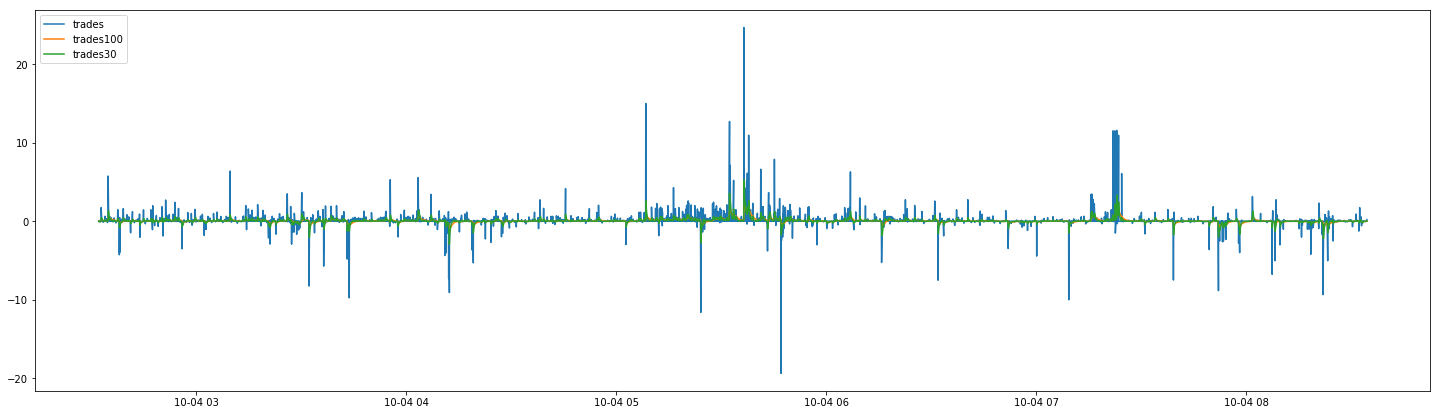

In [15]:
plt.figure(figsize=(25,7))
plt.plot(resample, label = 'trades')
plt.plot(resample100, label = 'trades100')
plt.plot(resample30, label = 'trades30')
plt.legend(loc='upper left')
plt.show()

In [16]:
df['aqsum10']= df['aq1']+df['aq2']+df['aq3']+df['aq4']+df['aq5']+df['aq6']+df['aq7']+df['aq8']+df['aq9']+df['aq10']
df['bqsum10']= df['bq1']+df['bq2']+df['bq3']+df['bq4']+df['bq5']+df['bq6']+df['bq7']+df['bq8']+df['bq9']+df['bq10']
df['aqsum3']= df['aq1']+df['aq2']+df['aq3']
df['bqsum3']= df['bq1']+df['bq2']+df['bq3']

In [17]:
df

,id,trade_px,trade_volume,b1,b2,b3,b4,b5,b6,b7,...,aq28,aq29,aq30,order_date_time,trades_date_time,update_type,aqsum10,bqsum10,aqsum3,bqsum3
order_date_time,,,,,,,,,,,,,,,,,,,,,
2017-10-04 02:31:43.962565,3,0.00,0.000000,4293.99,4292.71,4292.70,4292.69,4292.01,4292.00,4291.41,...,0.0400,0.0500,0.04,20171004 02:31:43.962565,20000101 00:00:00.000000,1,17.921544,4.779065,5.811544,2.204123
2017-10-04 02:31:45.618811,8,0.00,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.0400,0.0500,0.04,20171004 02:31:45.618811,20000101 00:00:00.000000,1,17.921544,4.790111,5.811544,3.414192
2017-10-04 02:31:47.228278,11,0.00,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,4.9272,0.0400,0.05,20171004 02:31:47.228278,20000101 00:00:00.000000,1,13.651544,4.790111,5.811544,3.414192
2017-10-04 02:31:48.884462,15,0.00,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.1000,4.9272,0.04,20171004 02:31:48.884462,20000101 00:00:00.000000,1,17.921544,4.790111,5.811544,3.414192
2017-10-04 02:31:50.665781,17,0.00,0.000000,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.0400,0.0500,0.04,20171004 02:31:50.665781,20000101 00:00:00.000000,1,17.921544,4.790111,5.811544,3.414192
2017-10-04 02:31:50.665781,60,4294.00,0.871900,4293.99,4292.70,4292.69,4292.01,4292.00,4291.41,4290.84,...,0.0400,0.0500,0.04,20171004 02:31:50.665781,20171004 02:31:51.790699,2,17.921544,4.790111,5.811544,3.414192
2017-10-04 02:31:52.228203,63,4294.00,0.871900,4293.99,4292.70,4292.01,4292.00,4291.41,4290.84,4290.83,...,0.0400,0.0400,0.04,20171004 02:31:52.228203,20171004 02:31:51.790699,1,16.059644,3.508043,8.339644,2.132123
2017-10-04 02:31:52.228203,65,4294.00,0.000002,4293.99,4292.70,4292.01,4292.00,4291.41,4290.84,4290.83,...,0.0400,0.0400,0.04,20171004 02:31:52.228203,20171004 02:31:52.525078,2,16.059644,3.508043,8.339644,2.132123
2017-10-04 02:31:54.118832,67,4294.00,0.000002,4293.99,4292.71,4292.70,4292.01,4292.00,4291.58,4291.41,...,4.9272,0.0400,0.05,20171004 02:31:54.118832,20171004 02:31:52.525078,1,12.239721,4.696111,7.009721,2.208123


In [18]:
df.set_index('order_date_time')
order_date_time=order_date_time.join(df['a1'])
order_date_time=order_date_time.join(df['b1'])
order_date_time=order_date_time.join(df['aq1'])
order_date_time=order_date_time.join(df['bq1'])
#order_date_time=order_date_time.join(df['aqsum3'])
#order_date_time=order_date_time.join(df['bqsum3'])
#order_date_time = pd.concat([df['aqsum10']], axis=1)
order_date_time.drop_duplicates(keep='last', inplace=True)
#date_time_vol=date_time_vol.join(df["trade_px"])

In [20]:
order_date_time.head(30)

,a1,aq1,b1,bq1,trade_volume,vol30,vol10
2017-10-04 02:31:50.665781,4294.000000,2.481624,4293.990000,2.082123,NaN,NaN,NaN
2017-10-04 02:31:52.228203,4294.000000,1.609724,4293.990000,2.092123,NaN,NaN,NaN
2017-10-04 02:32:01.978353,4294.000000,1.609721,4293.990000,2.092123,NaN,NaN,NaN
2017-10-04 02:32:06.915861,4294.000000,1.609719,4293.990000,2.092123,NaN,NaN,NaN
2017-10-04 02:32:10.525244,4294.000000,1.609719,4293.990000,2.112123,NaN,NaN,NaN
2017-10-04 02:32:11.000000,4294.000000,1.609716,4293.990000,2.112123,2.320000e-06,0.000002,0.000002
2017-10-04 02:32:12.000000,4294.000000,1.609714,4293.990000,2.112123,1.000000e-02,0.005168,0.005051
2017-10-04 02:32:12.337828,4294.000000,1.609711,4293.990000,2.112123,9.444573e-03,0.006689,0.006545
2017-10-04 02:32:13.000000,4294.000000,1.608045,4293.990000,2.112123,8.889147e-03,0.007296,0.007149
2017-10-04 02:32:14.000000,4294.000000,1.606378,4293.990000,2.112123,7.778293e-03,0.007405,0.007280


In [21]:
order_date_time['abratio']= order_date_time['aq1']/(order_date_time['aq1']+order_date_time['bq1'])
order_date_time['ratio30']=order_date_time['abratio'].ewm(span=30).mean()
order_date_time['ratio100']=order_date_time['abratio'].ewm(span=100).mean()
order_date_time.head(20)

,a1,aq1,b1,bq1,trade_volume,vol30,vol10,abratio,ratio30,ratio100
2017-10-04 02:31:50.665781,4294.0,2.481624,4293.99,2.082123,NaN,NaN,NaN,0.543769,0.543769,0.543769
2017-10-04 02:31:52.228203,4294.0,1.609724,4293.99,2.092123,NaN,NaN,NaN,0.434843,0.487491,0.488762
2017-10-04 02:32:01.978353,4294.0,1.609721,4293.99,2.092123,NaN,NaN,NaN,0.434843,0.468759,0.470428
2017-10-04 02:32:06.915861,4294.0,1.609719,4293.99,2.092123,NaN,NaN,NaN,0.434843,0.459414,0.461263
2017-10-04 02:32:10.525244,4294.0,1.609719,4293.99,2.112123,NaN,NaN,NaN,0.432506,0.453292,0.455279
2017-10-04 02:32:11.000000,4294.0,1.609716,4293.99,2.112123,0.000002,0.000002,0.000002,0.432506,0.449225,0.451291
2017-10-04 02:32:12.000000,4294.0,1.609714,4293.99,2.112123,0.010000,0.005168,0.005051,0.432505,0.446333,0.448444
2017-10-04 02:32:12.337828,4294.0,1.609711,4293.99,2.112123,0.009445,0.006689,0.006545,0.432505,0.444176,0.446309
2017-10-04 02:32:13.000000,4294.0,1.608045,4293.99,2.112123,0.008889,0.007296,0.007149,0.432251,0.442471,0.444619
2017-10-04 02:32:14.000000,4294.0,1.606378,4293.99,2.112123,0.007778,0.007405,0.007280,0.431996,0.441082,0.443240


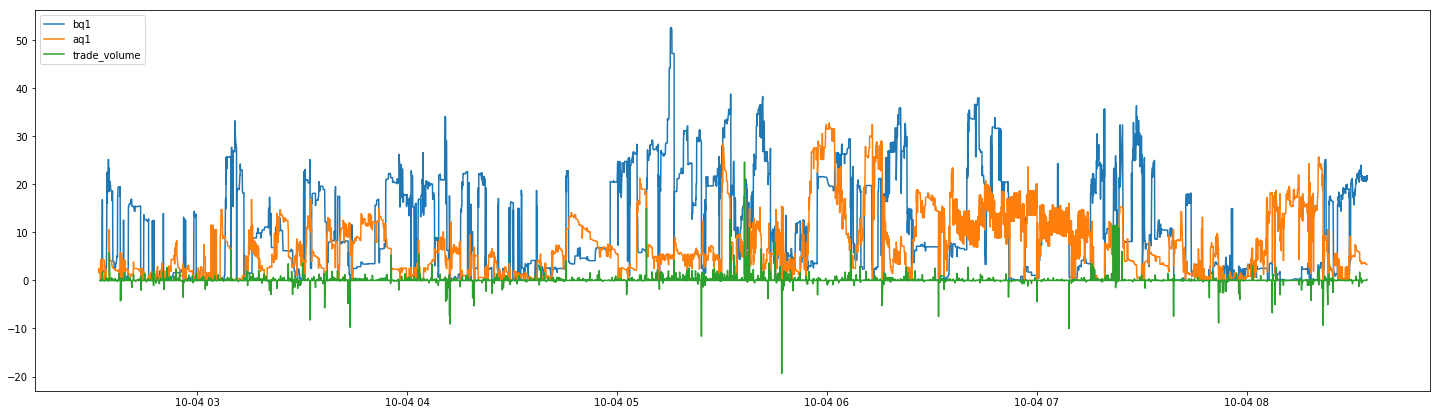

In [22]:
plt.figure(figsize=(25,7))
plt.plot(order_date_time['bq1'], label = 'bq1')
plt.plot(order_date_time['aq1'])
plt.plot(order_date_time['trade_volume'])
plt.legend(loc='upper left')
plt.show()

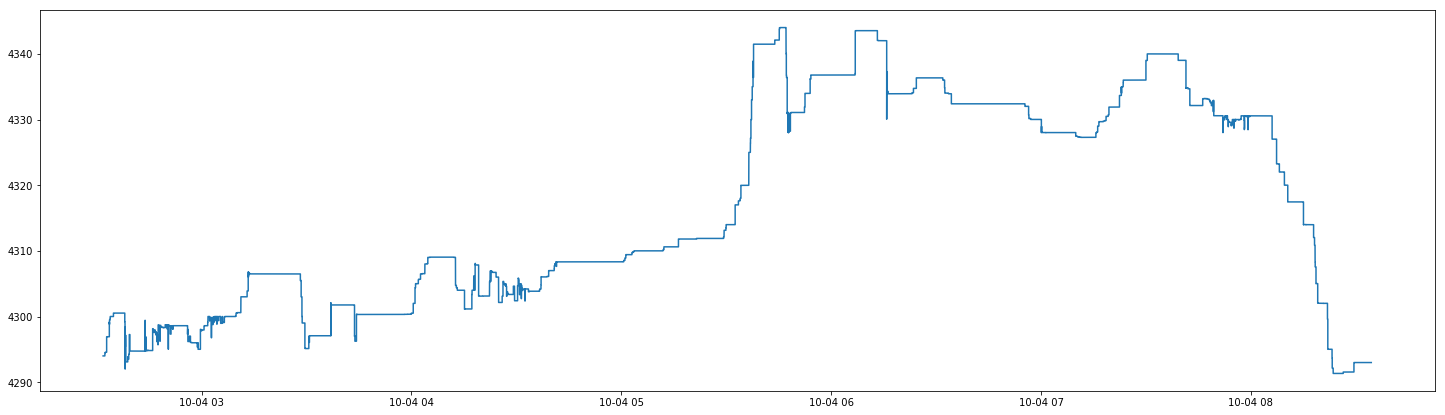

In [23]:
df=df.drop(df.index[:5])
plt.figure(figsize=(25,7))
plt.plot(df['trade_px'])
plt.show()

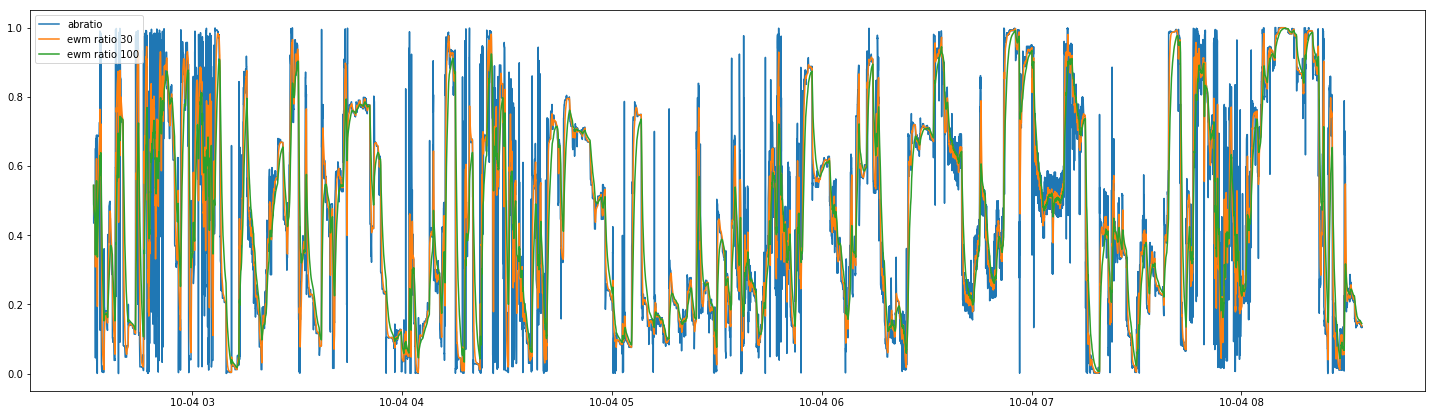

In [24]:
plt.figure(figsize=(25,7))
#plt.plot(abratio)
plt.plot(order_date_time['abratio'], label='abratio')
plt.plot(order_date_time['ratio30'], label='ewm ratio 30')
plt.plot(order_date_time['ratio100'], label='ewm ratio 100')
#plt.plot(abratio_ewm20, label='ewm 30')
plt.legend(loc='upper left')
plt.show()

In [25]:
order_date_time["Price"] = order_date_time[["b1", "a1"]].mean(axis=1)
order_date_time['PriceTarget'] = order_date_time['Price'].shift(-10)
order_date_time['Price-10'] = order_date_time['Price'].shift(10)
order_date_time['Price-5'] = order_date_time['Price'].shift(5)
order_date_time["Spread"] = order_date_time["a1"]-order_date_time["b1"]
order_date_time["aaq1"] = order_date_time["a1"]*order_date_time["aq1"]
order_date_time["bbq1"] = order_date_time["b1"]*order_date_time["bq1"]

In [26]:
order_date_time=order_date_time.drop(order_date_time.index[:10])
order_date_time.head(30)

,a1,aq1,b1,bq1,trade_volume,vol30,vol10,abratio,ratio30,ratio100,Price,PriceTarget,Price-10,Price-5,Spread,aaq1,bbq1
2017-10-04 02:32:15.000000,4294.000000,1.604711,4293.990000,2.112123,6.667440e-03,0.007261,0.007173,0.431741,0.439923,0.442087,4293.995000,4294.158333,4293.995000,4293.995000,0.01,6890.630537,9069.435427
2017-10-04 02:32:16.000000,4294.000000,1.603045,4293.990000,2.112123,5.556587e-03,0.006966,0.006928,0.431486,0.438935,0.441104,4293.995000,4294.321667,4293.995000,4293.995000,0.01,6883.473870,9069.435427
2017-10-04 02:32:17.000000,4294.000000,1.601378,4293.990000,2.112123,4.445733e-03,0.006573,0.006595,0.431231,0.438078,0.440250,4293.995000,4294.485000,4293.995000,4293.995000,0.01,6876.317204,9069.435427
2017-10-04 02:32:17.275394,4294.000000,1.599711,4293.990000,2.112123,3.890307e-03,0.006189,0.006270,0.430976,0.437323,0.439498,4293.995000,4294.485000,4293.995000,4293.995000,0.01,6869.160537,9069.435427
2017-10-04 02:32:18.000000,4294.000000,1.224711,4293.990000,2.112123,3.334880e-03,0.005811,0.005949,0.367028,0.430150,0.433961,4293.995000,4294.485000,4293.995000,4293.995000,0.01,5258.910537,9069.435427
2017-10-04 02:32:19.000000,4294.000000,0.849711,4293.990000,2.112123,2.224027e-03,0.005366,0.005576,0.286887,0.416060,0.423327,4293.995000,4294.485000,4293.995000,4293.995000,0.01,3648.660537,9069.435427
2017-10-04 02:32:20.000000,4294.000000,0.474711,4293.990000,2.112123,1.113173e-03,0.004868,0.005162,0.183511,0.393937,0.406851,4293.995000,4294.525000,4293.995000,4293.995000,0.01,2038.410537,9069.435427
2017-10-04 02:32:20.353525,4294.000000,0.099711,4293.990000,2.112123,5.577467e-04,0.004388,0.004764,0.045081,0.361736,0.383156,4293.995000,4294.565000,4293.995000,4293.995000,0.01,428.160537,9069.435427
2017-10-04 02:32:21.000000,4294.000000,0.099710,4293.990000,2.112123,2.320000e-06,0.003922,0.004378,0.045080,0.333297,0.361981,4293.995000,4294.565000,4293.995000,4293.995000,0.01,428.155556,9069.435427
2017-10-04 02:32:21.947281,4294.000000,0.099709,4293.990000,2.112123,4.985567e-02,0.008609,0.007852,0.045080,0.308051,0.342947,4293.995000,4294.565000,4293.995000,4293.995000,0.01,428.150575,9069.435427


In [27]:
order_date_time.to_csv('C:\\Users\\Jason\\Documents\\Python\\Stock Market Prediction\\Crypto\\BTCUSD_resample.csv',index=False)

In [28]:
#backtrader_data=backtrader_data.drop_duplicates(['TradePrice'])
Open = order_date_time['Price']
High = order_date_time['Price']
Low = order_date_time['Price']
Close = order_date_time['Price']
RNN20 = order_date_time['PriceTarget']
trade_volume = order_date_time['trade_volume']
backtrader_data = pd.concat([Open, High, Low, Close, RNN20, trade_volume],axis=1)
#date_time=pd.to_datetime(backtrader_data.trades_date_time, format="%Y%m%d %H:%M:%S.%f").to_frame()
backtrader_data = backtrader_data.drop(backtrader_data.index[range(0,5)])
backtrader_data.head()


,Price,Price,Price,Price,PriceTarget,trade_volume
2017-10-04 02:32:19.000000,4293.995,4293.995,4293.995,4293.995,4294.485,0.002224
2017-10-04 02:32:20.000000,4293.995,4293.995,4293.995,4293.995,4294.525,0.001113
2017-10-04 02:32:20.353525,4293.995,4293.995,4293.995,4293.995,4294.565,0.000558
2017-10-04 02:32:21.000000,4293.995,4293.995,4293.995,4293.995,4294.565,0.000002
2017-10-04 02:32:21.947281,4293.995,4293.995,4293.995,4293.995,4294.565,0.049856


In [29]:
backtrader_data.to_csv('BTCUSD_backtrader.csv',index=True)